In [ ]:
# ============================
# Cell 1: Imports & Config
# ============================
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# LLM client (optional)
os.environ["OPENAI_API_KEY"] = "sk-"
try:
    from openai import OpenAI
    client = OpenAI()   # needs OPENAI_API_KEY in env
except Exception:
    client = None
    print("⚠️ OpenAI client not initialised – LLM steps will use fallback.")


In [2]:
# ============================
# Cell 2: Load Data
# ============================
DATA_PATH = r"C:\Users\CYJ\Downloads\preprocessed_data.csv"   # adjust if needed

df = pd.read_csv(DATA_PATH)

target_col = "Q274: How many children do you have"

# numeric-only and drop rows where target is missing
num_df = df.select_dtypes(include=[np.number]).dropna(subset=[target_col]).reset_index(drop=True)

print("Data shape (numeric, target not null):", num_df.shape)
display(num_df.head())


Data shape (numeric, target not null): (2012, 287)


,N_REGION_ISO: Region ISO 3166-2,Q1: Important in life: Family,Q2: Important in life: Friends,Q3: Important in life: Leisure time,Q4: Important in life: Politics,Q5: Important in life: Work,Q6: Important in life: Religion,Q7: Important child qualities: good manners,Q8: Important child qualities: independence,Q9: Important child qualities: hard work,...,Q283: Respondent's Father - Occupational group (when respondent was 14 years old),Q284: Sector of employment,Q285: Are you the chief wage earner in your house,Q286: Family savings during past year,Q287: Social class (subjective),Q288: Scale of incomes,Q289: Religious denominations - major groups,Q290: Ethnic group,O1_LONGITUDE: Geographical Coordinates - Longitude,O2_LATITUDE: Geographical Coordinates - Latitude
0,702001.0,1.0,2.0,1.0,3.0,2.0,2.0,2.0,1.0,2.0,...,3.0,2.0,2.0,1.0,2.0,5.0,0.0,702004.0,103.82,1.23
1,702001.0,1.0,2.0,1.0,3.0,3.0,2.0,1.0,2.0,1.0,...,4.0,2.0,1.0,2.0,4.0,1.0,0.0,702004.0,103.81,1.23
2,702001.0,1.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,...,7.0,2.0,1.0,1.0,4.0,4.0,0.0,702004.0,103.84,1.22
3,702001.0,1.0,2.0,2.0,3.0,3.0,4.0,1.0,1.0,2.0,...,1.0,2.0,2.0,1.0,3.0,6.0,0.0,702004.0,103.84,1.22
4,702001.0,1.0,1.0,1.0,4.0,1.0,2.0,1.0,1.0,1.0,...,5.0,2.0,2.0,1.0,2.0,8.0,5.0,702003.0,103.84,1.23


ENHANCED FEATURE TYPE ANALYSIS

📊 Feature Classification:
  Categorical: 30 features
  Ordinal:     250 features
  Numerical:   6 features
  Total:       286 features

📋 Categorical features:
   1. N_REGION_ISO: Region ISO 3166-2 (5 unique values)
   2. Q21: Neighbors: Immigrants/foreign workers (2 unique values)
   3. Q22: Neighbors: Homosexuals (2 unique values)
   4. Q26: Neighbors: People who speak a different language (2 unique values)
   5. Q34: Jobs scarce: Employers should give priority to (nation) people than immigrants (5 unique values)
   6. Q36: Homosexual couples are as good parents as other couples (5 unique values)
   7. Q121: Impact of immigrants on the development of the country (5 unique values)
   8. Q138: Frequency in your neighborhood: Sexual harassment (4 unique values)
   9. Q182: Justifiable: Homosexuality (10 unique values)
  10. Q186: Justifiable: Sex before marriage (10 unique values)
  11. Q193: Justifiable: Having casual sex (10 unique values)
  12. Q260: S

C:\Users\CYJ\AppData\Local\Temp\ipykernel_32344\4168344319.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_processed[col] = df[col]
C:\Users\CYJ\AppData\Local\Temp\ipykernel_32344\4168344319.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_processed[col] = df[col]
C:\Users\CYJ\AppData\Local\Temp\ipykernel_32344\4168344319.py:115: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u


✅ Correlation matrices calculated:
  Shape: (363, 363)
  Mean abs correlation (Pearson):  0.058
  Mean abs correlation (Spearman): 0.059

🔍 Highly Correlated Pairs (Spearman):
  |r| > 0.7: 33 pairs
  |r| > 0.8: 10 pairs
  |r| > 0.9: 4 pairs

TOP CORRELATED PAIRS (|r| > 0.9) - HIGHLY REDUNDANT FEATURES


,feature_1,feature_2,correlation,abs_correlation
3,Q261: Year of birth,Q262: Age,-0.999537,0.999537
0,Q263: Respondent immigrant_2.0,Q266: Country of birth: Respondent,-0.992962,0.992962
1,Q264: Mother immigrant_2.0,Q267: Country of birth: Mother of the respondent,-0.974907,0.974907
2,Q265: Father immigrant_2.0,Q268: Country of birth: Father of the respondent,-0.971306,0.971306



TOP CORRELATED PAIRS (|r| > 0.8) - STRONG MULTICOLLINEARITY


,feature_1,feature_2,correlation,abs_correlation
9,Q261: Year of birth,Q262: Age,-0.999537,0.999537
1,Q263: Respondent immigrant_2.0,Q266: Country of birth: Respondent,-0.992962,0.992962
2,Q264: Mother immigrant_2.0,Q267: Country of birth: Mother of the respondent,-0.974907,0.974907
3,Q265: Father immigrant_2.0,Q268: Country of birth: Father of the respondent,-0.971306,0.971306
0,Q138: Frequency in your neighb_3.0,Q138: Frequency in your neighb_4.0,-0.897364,0.897364
5,Q289: Religious denominations _5.0,Q290: Ethnic group_702006.0,0.875684,0.875684
8,Q167: Believe in: hell,Q168: Believe in: heaven,0.869633,0.869633
6,Q146: Worries: A war involving my country,Q147: Worries: A terrorist attack,0.846315,0.846315
7,Q146: Worries: A war involving my country,Q148: Worries: A civil war,0.830545,0.830545
4,Q272: Language at home_2810.0,Q290: Ethnic group_702006.0,0.824714,0.824714



CORRELATION HEATMAPS - VERTICALLY STACKED


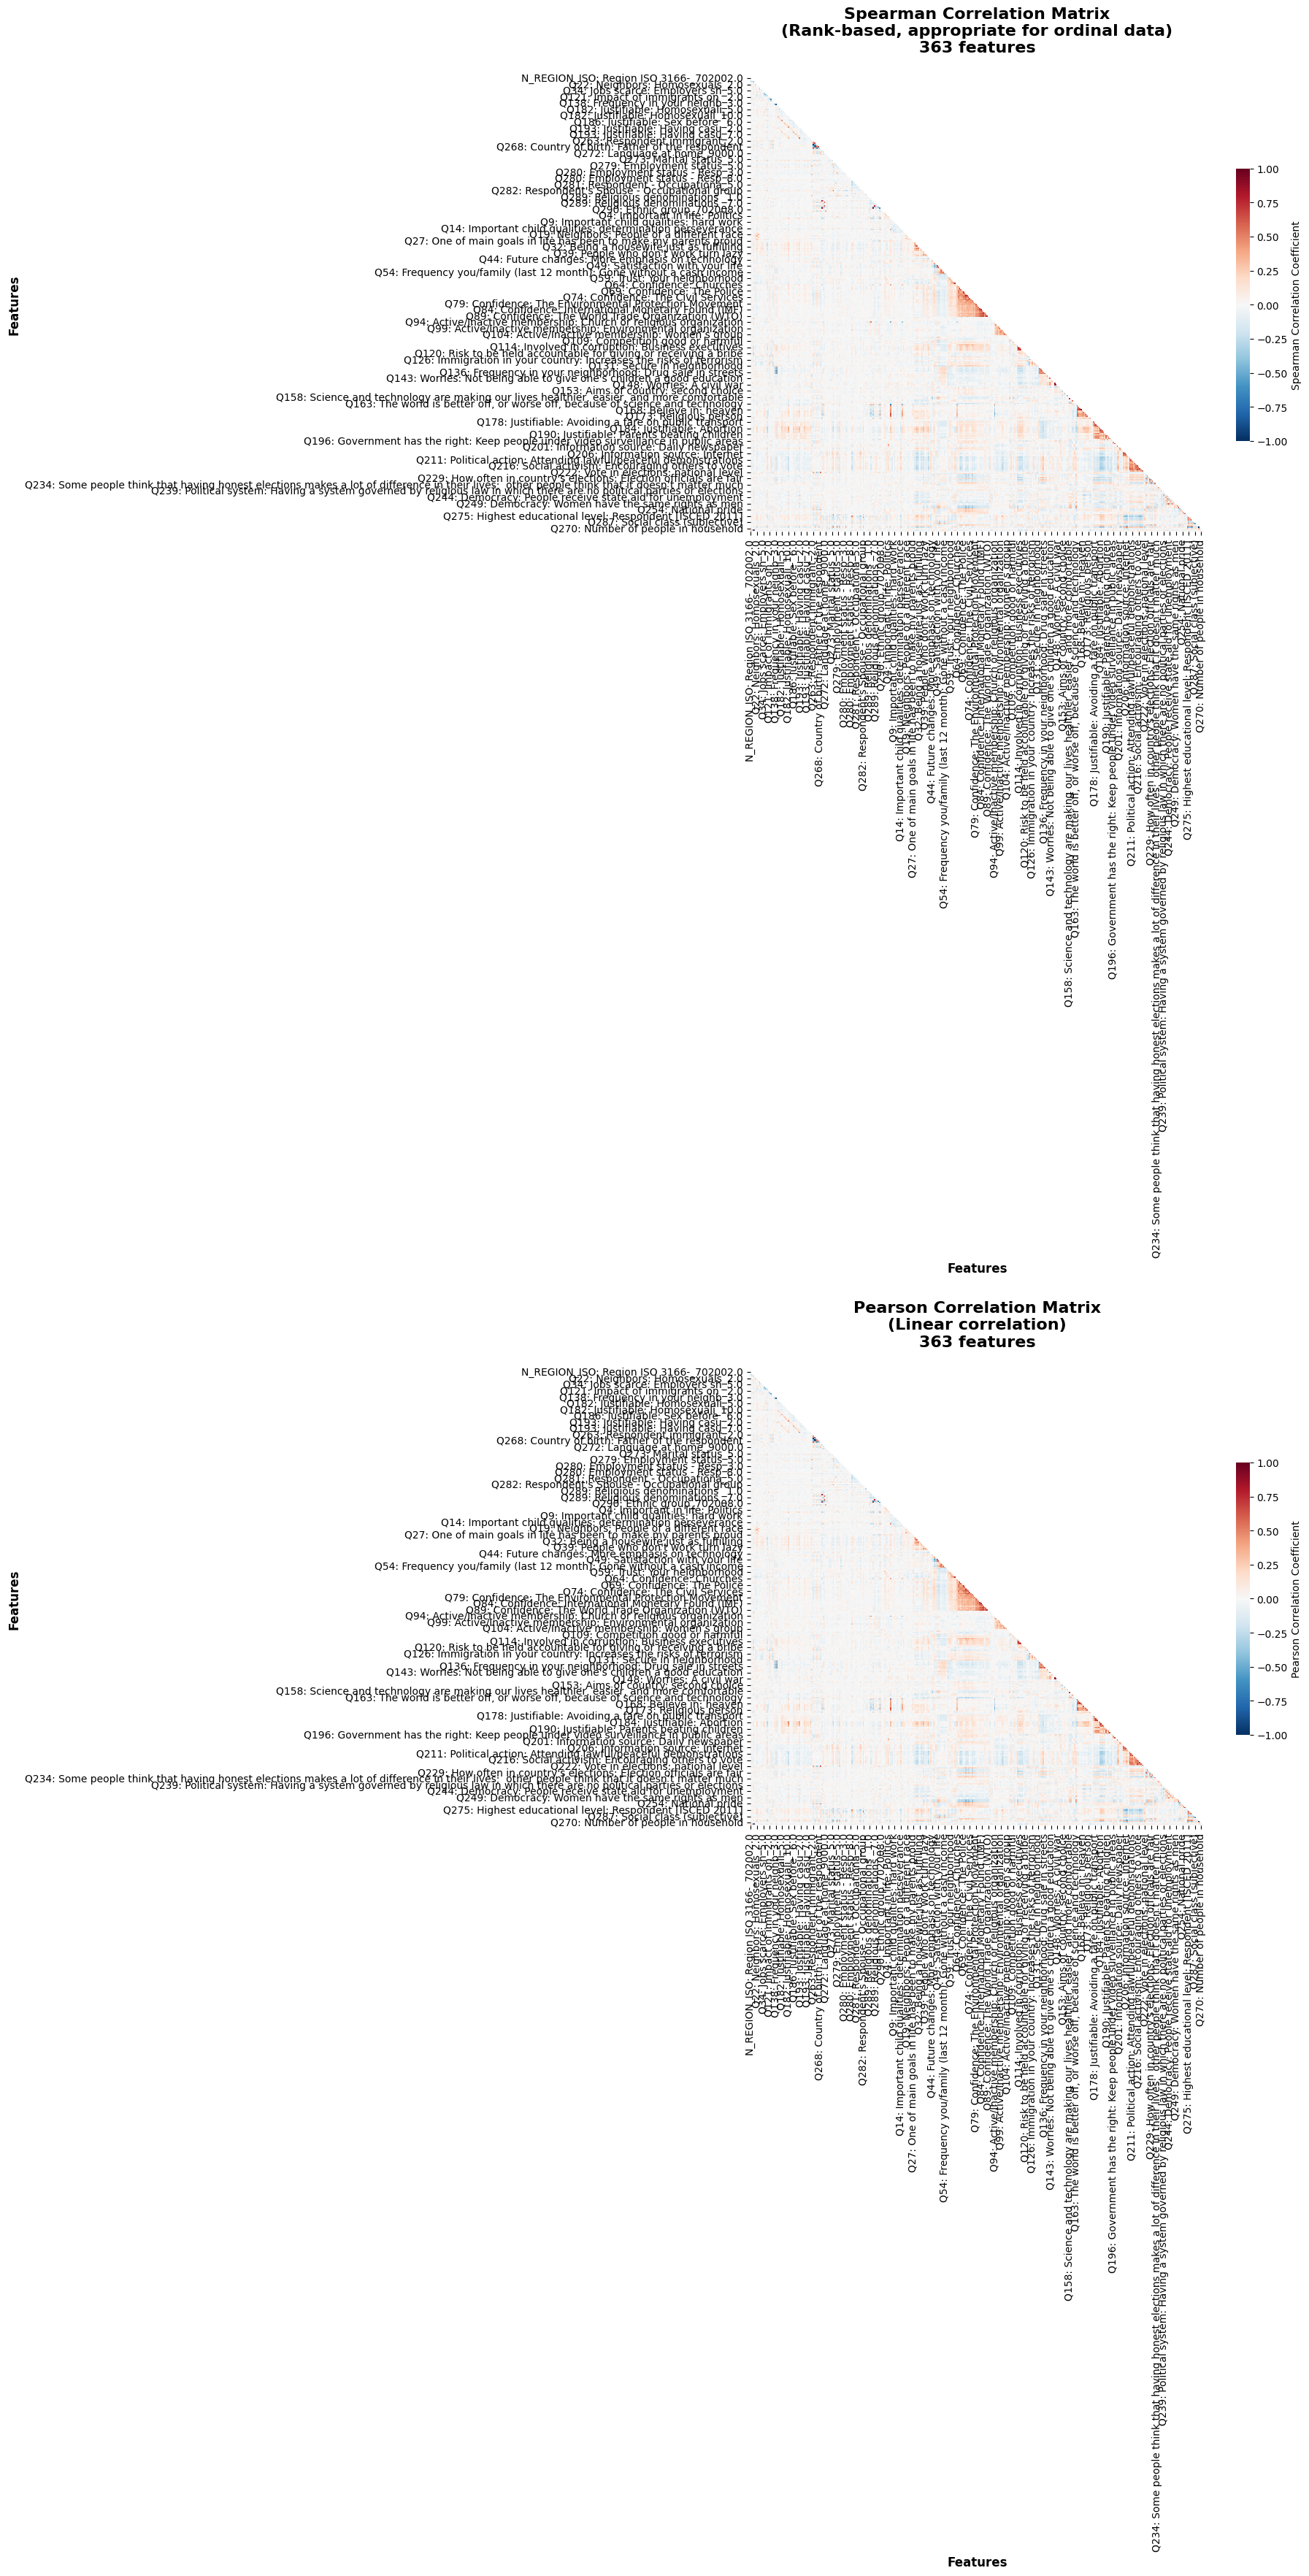


✅ Correlation heatmaps displayed (vertically stacked)
   • Spearman (top): Appropriate for ordinal data
   • Pearson (bottom): Standard linear correlation

FEATURE-TARGET CORRELATION ANALYSIS

Top 20 features most POSITIVELY correlated with Q274: How many children do you have:
   1. Q262: Age                                                              : +0.4856
   2. Q270: Number of people in household                                    : +0.2439
   3. Q218: Political actions online: Signing an electronic petition         : +0.2388
   4. Q209: Political action: Signing a petition                             : +0.2346
   5. Q206: Information source: Internet                                     : +0.2336
   6. Q36: Homosexual couples are as_4.0                                     : +0.2324
   7. Q279: Employment status_5.0                                            : +0.2243
   8. Q279: Employment status_4.0                                            : +0.2133
   9. Q217: Political act

,Feature,Correlation,Abs_Correlation
362,Q273: Marital status_6.0,-0.710873,0.710873
361,Q261: Year of birth,-0.486459,0.486459
0,Q262: Age,0.485587,0.485587
360,Q282: Respondent's Spouse - Occupational group,-0.455614,0.455614
359,Q271: Do you live with your parents,-0.414240,0.414240
358,Q276: Highest educational level: Respondent's Spouse [ISCED 2011],-0.409269,0.409269
357,Q183: Justifiable: Prostitution,-0.349710,0.349710
356,Q187: Justifiable: Suicide,-0.339612,0.339612
355,Q184: Justifiable: Abortion,-0.325194,0.325194
354,Q185: Justifiable: Divorce,-0.309390,0.309390



MULTICOLLINEARITY SUMMARY

📊 Dataset Overview:
  • Original features:   286
  • Processed features:  363
  • Target variable:     Q274: How many children do you have
  • Samples:             2012

  Feature breakdown:
    - Categorical:       30 features
    - Ordinal:           250 features
    - Numerical:         6 features

📈 Correlation Statistics (Spearman):
  • Mean absolute correlation:   0.0565
  • Median absolute correlation: 0.0372
  • Max absolute correlation:    0.9995
  • Min absolute correlation:    0.0000
  • Std dev of correlations:     0.0671

  Correlation distribution:
    - Pairs with |r| > 0.9:      4 ( 0.01%)
    - Pairs with |r| > 0.8:     10 ( 0.02%)
    - Pairs with |r| > 0.7:     33 ( 0.05%)
    - Pairs with |r| > 0.5:    216 ( 0.33%)
    - Pairs with |r| > 0.3:    846 ( 1.29%)

💡 Recommendations:
  🔴 CRITICAL: 4 pairs show very high correlation (|r| > 0.9)
     → These features are nearly redundant
     → STRONGLY recommend removing one from each pair
     

In [ ]:
# ============================
# Cell 2: Feature Correlation & Multicollinearity Heatmap
# Enhanced version with proper categorical, ordinal, and numerical handling
# Vertically stacked plots with full output display
# ============================

# Configure pandas to display all rows and columns without truncation
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("="*70)
print("ENHANCED FEATURE TYPE ANALYSIS")
print("="*70)

# ============================
# Step 1: Classify features into types
# ============================

def classify_features(df, target_col):
    """
    Classify features into categorical, ordinal, and numerical types
    based on the number of unique values and feature names.
    """
    categorical_features = []
    ordinal_features = []
    numerical_features = []
    
    feature_cols = [c for c in df.columns if c != target_col]
    
    for col in feature_cols:
        n_unique = df[col].nunique()
        
        # Categorical features (encoded as numbers but represent categories)
        if any(keyword in col.upper() for keyword in [
            'REGION_ISO', 'SEX', 'IMMIGRANT', 'CITIZEN', 'COUNTRY OF BIRTH',
            'LANGUAGE', 'MARITAL', 'EMPLOYMENT STATUS', 'OCCUPATIONAL GROUP',
            'SECTOR', 'WAGE EARNER', 'RELIGIOUS DENOMINATIONS', 'ETHNIC GROUP'
        ]):
            categorical_features.append(col)
        
        # Numerical features (continuous or count variables)
        elif any(keyword in col.upper() for keyword in [
            'YEAR OF BIRTH', 'AGE', 'LONGITUDE', 'LATITUDE',
            'NUMBER OF PEOPLE', 'HOW MANY CHILDREN'
        ]) or (n_unique > 50 and 'Q' not in col):
            numerical_features.append(col)
        
        # Ordinal features (ordered scales, ratings, levels)
        else:
            ordinal_features.append(col)
    
    return categorical_features, ordinal_features, numerical_features

# Classify all features
categorical_features, ordinal_features, numerical_features = classify_features(num_df, target_col)

print(f"\n📊 Feature Classification:")
print(f"  Categorical: {len(categorical_features)} features")
print(f"  Ordinal:     {len(ordinal_features)} features")
print(f"  Numerical:   {len(numerical_features)} features")
print(f"  Total:       {len(categorical_features) + len(ordinal_features) + len(numerical_features)} features")

print(f"\n📋 Categorical features:")
for i, feat in enumerate(categorical_features, 1):
    print(f"  {i:2d}. {feat} ({num_df[feat].nunique()} unique values)")

print(f"\n📋 Numerical features:")
for i, feat in enumerate(numerical_features, 1):
    print(f"  {i:2d}. {feat}")

# ============================
# Step 2: Prepare data for correlation analysis
# ============================

print(f"\n{'='*70}")
print("DATA PREPARATION FOR CORRELATION ANALYSIS")
print("="*70)

def prepare_data_for_correlation(df, categorical_features, ordinal_features, numerical_features, target_col):
    """
    Prepare data for multicollinearity analysis:
    - Categorical: One-hot encode if <=10 categories, else use frequency encoding
    - Ordinal: Keep as-is (already numeric and ordered)
    - Numerical: Keep as-is
    """
    import pandas as pd
    df_processed = pd.DataFrame()
    
    # Handle categorical features
    print("\nProcessing categorical features...")
    for col in categorical_features:
        if col not in df.columns:
            continue
        
        n_unique = df[col].nunique()
        
        if n_unique <= 10:
            # One-hot encode for low cardinality
            dummies = pd.get_dummies(df[col], prefix=col[:30], drop_first=True)
            df_processed = pd.concat([df_processed, dummies], axis=1)
            print(f"  ✓ One-hot encoded: {col} → {len(dummies.columns)} columns")
        else:
            # Frequency encoding for high cardinality
            freq_map = df[col].value_counts(normalize=True).to_dict()
            df_processed[col] = df[col].map(freq_map)
            print(f"  ✓ Frequency encoded: {col}")
    
    # Handle ordinal features (keep as-is)
    print(f"\nProcessing ordinal features...")
    for col in ordinal_features:
        if col in df.columns:
            df_processed[col] = df[col]
    print(f"  ✓ Added {len(ordinal_features)} ordinal features")
    
    # Handle numerical features (keep as-is)
    print(f"\nProcessing numerical features...")
    for col in numerical_features:
        if col in df.columns:
            df_processed[col] = df[col]
    print(f"  ✓ Added {len(numerical_features)} numerical features")
    
    # Add target
    if target_col in df.columns:
        df_processed[target_col] = df[target_col]
    
    # Remove rows with any missing values
    df_processed = df_processed.dropna()
    
    print(f"\n✅ Final processed shape: {df_processed.shape}")
    return df_processed

# Prepare data
df_for_correlation = prepare_data_for_correlation(
    num_df, categorical_features, ordinal_features, numerical_features, target_col
)

# ============================
# Step 3: Calculate correlation matrices
# ============================

print(f"\n{'='*70}")
print("CALCULATING CORRELATION MATRICES")
print("="*70)

print("\nCalculating correlations...")
print("  • Pearson:  For linear relationships (numerical features)")
print("  • Spearman: For monotonic relationships (ordinal features)")

# Exclude target from correlation matrix
feature_cols_processed = [c for c in df_for_correlation.columns if c != target_col]

# Calculate Pearson correlation
correlation_matrix_pearson = df_for_correlation[feature_cols_processed].corr(method='pearson')

# Calculate Spearman correlation (more appropriate for ordinal data)
correlation_matrix_spearman = df_for_correlation[feature_cols_processed].corr(method='spearman')

print(f"\n✅ Correlation matrices calculated:")
print(f"  Shape: {correlation_matrix_pearson.shape}")
print(f"  Mean abs correlation (Pearson):  {correlation_matrix_pearson.abs().mean().mean():.3f}")
print(f"  Mean abs correlation (Spearman): {correlation_matrix_spearman.abs().mean().mean():.3f}")

# ============================
# Step 4: Identify highly correlated pairs
# ============================

def find_high_correlations(corr_matrix, threshold=0.7):
    """
    Find pairs of features with correlation above threshold.
    """
    high_corr_pairs = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append({
                    'feature_1': corr_matrix.columns[i],
                    'feature_2': corr_matrix.columns[j],
                    'correlation': corr_matrix.iloc[i, j],
                    'abs_correlation': abs(corr_matrix.iloc[i, j])
                })
    
    return pd.DataFrame(high_corr_pairs).sort_values('abs_correlation', ascending=False) if high_corr_pairs else pd.DataFrame()

high_corr_pairs_07 = find_high_correlations(correlation_matrix_spearman, threshold=0.7)
high_corr_pairs_08 = find_high_correlations(correlation_matrix_spearman, threshold=0.8)
high_corr_pairs_09 = find_high_correlations(correlation_matrix_spearman, threshold=0.9)

print(f"\n🔍 Highly Correlated Pairs (Spearman):")
print(f"  |r| > 0.7: {len(high_corr_pairs_07)} pairs")
print(f"  |r| > 0.8: {len(high_corr_pairs_08)} pairs")
print(f"  |r| > 0.9: {len(high_corr_pairs_09)} pairs")

if len(high_corr_pairs_09) > 0:
    print(f"\n{'='*70}")
    print(f"TOP CORRELATED PAIRS (|r| > 0.9) - HIGHLY REDUNDANT FEATURES")
    print(f"{'='*70}")
    display(high_corr_pairs_09)

if len(high_corr_pairs_08) > 0:
    print(f"\n{'='*70}")
    print(f"TOP CORRELATED PAIRS (|r| > 0.8) - STRONG MULTICOLLINEARITY")
    print(f"{'='*70}")
    display(high_corr_pairs_08)

# ============================
# Step 5: Visualize Both Correlation Matrices 
# ============================

print(f"\n{'='*70}")
print("CORRELATION HEATMAPS - VERTICALLY STACKED")
print("="*70)

# Create masks for upper triangle
mask_spearman = np.triu(np.ones_like(correlation_matrix_spearman, dtype=bool))
mask_pearson = np.triu(np.ones_like(correlation_matrix_pearson, dtype=bool))

# Create figure with 2 rows, 1 column (vertically stacked)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 36))

# Plot 1: Spearman Correlation (top)
sns.heatmap(
    correlation_matrix_spearman,
    mask=mask_spearman,
    cmap='RdBu_r',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0,
    cbar_kws={"shrink": 0.6, "label": "Spearman Correlation Coefficient"},
    ax=ax1
)

ax1.set_title(
    f'Spearman Correlation Matrix\n'
    f'(Rank-based, appropriate for ordinal data)\n'
    f'{len(feature_cols_processed)} features',
    fontsize=16,
    fontweight='bold',
    pad=25
)
ax1.set_xlabel('Features', fontsize=12, fontweight='bold')
ax1.set_ylabel('Features', fontsize=12, fontweight='bold')

# Plot 2: Pearson Correlation (bottom)
sns.heatmap(
    correlation_matrix_pearson,
    mask=mask_pearson,
    cmap='RdBu_r',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0,
    cbar_kws={"shrink": 0.6, "label": "Pearson Correlation Coefficient"},
    ax=ax2
)

ax2.set_title(
    f'Pearson Correlation Matrix\n'
    f'(Linear correlation)\n'
    f'{len(feature_cols_processed)} features',
    fontsize=16,
    fontweight='bold',
    pad=25
)
ax2.set_xlabel('Features', fontsize=12, fontweight='bold')
ax2.set_ylabel('Features', fontsize=12, fontweight='bold')

# Add spacing between subplots
plt.tight_layout(pad=4.0)
plt.show()

print("\n✅ Correlation heatmaps displayed (vertically stacked)")
print(f"   • Spearman (top): Appropriate for ordinal data")
print(f"   • Pearson (bottom): Standard linear correlation")

# ============================
# Step 6: Feature-Target Correlation Analysis
# ============================

print(f"\n{'='*70}")
print("FEATURE-TARGET CORRELATION ANALYSIS")
print("="*70)

# Calculate correlation with target
if target_col in df_for_correlation.columns:
    # Use Spearman for ordinal target
    corr_with_target = df_for_correlation[feature_cols_processed + [target_col]].corr(method='spearman')[target_col]
    corr_with_target = corr_with_target.drop(target_col).sort_values(ascending=False)
    
    print(f"\nTop 20 features most POSITIVELY correlated with {target_col}:")
    print("="*70)
    for i, (feat, corr) in enumerate(corr_with_target.head(20).items(), 1):
        print(f"  {i:2d}. {feat:70s} : {corr:+.4f}")
    
    print(f"\n\nTop 20 features most NEGATIVELY correlated with {target_col}:")
    print("="*70)
    for i, (feat, corr) in enumerate(corr_with_target.tail(20).items(), 1):
        print(f"  {i:2d}. {feat:70s} : {corr:+.4f}")
    
    # Create correlation table
    corr_table = pd.DataFrame({
        'Feature': corr_with_target.index,
        'Correlation': corr_with_target.values,
        'Abs_Correlation': abs(corr_with_target.values)
    }).sort_values('Abs_Correlation', ascending=False)
    
    print(f"\n\nComplete Feature-Target Correlation Table (sorted by absolute value):")
    print("="*70)
    display(corr_table)

# ============================
# Step 7: Summary Statistics
# ============================

print(f"\n{'='*70}")
print("MULTICOLLINEARITY SUMMARY")
print("="*70)

print(f"\n📊 Dataset Overview:")
print(f"  • Original features:   {len(categorical_features) + len(ordinal_features) + len(numerical_features)}")
print(f"  • Processed features:  {len(feature_cols_processed)}")
print(f"  • Target variable:     {target_col}")
print(f"  • Samples:             {len(df_for_correlation)}")
print(f"\n  Feature breakdown:")
print(f"    - Categorical:       {len(categorical_features)} features")
print(f"    - Ordinal:           {len(ordinal_features)} features")
print(f"    - Numerical:         {len(numerical_features)} features")

print(f"\n📈 Correlation Statistics (Spearman):")
corr_values = []
for i in range(len(correlation_matrix_spearman)):
    for j in range(i+1, len(correlation_matrix_spearman)):
        corr_values.append(abs(correlation_matrix_spearman.iloc[i, j]))

if corr_values:
    print(f"  • Mean absolute correlation:   {np.mean(corr_values):.4f}")
    print(f"  • Median absolute correlation: {np.median(corr_values):.4f}")
    print(f"  • Max absolute correlation:    {np.max(corr_values):.4f}")
    print(f"  • Min absolute correlation:    {np.min(corr_values):.4f}")
    print(f"  • Std dev of correlations:     {np.std(corr_values):.4f}")
    
    total_pairs = len(corr_values)
    print(f"\n  Correlation distribution:")
    print(f"    - Pairs with |r| > 0.9:  {(np.array(corr_values) > 0.9).sum():5d} ({(np.array(corr_values) > 0.9).sum() / total_pairs * 100:5.2f}%)")
    print(f"    - Pairs with |r| > 0.8:  {(np.array(corr_values) > 0.8).sum():5d} ({(np.array(corr_values) > 0.8).sum() / total_pairs * 100:5.2f}%)")
    print(f"    - Pairs with |r| > 0.7:  {(np.array(corr_values) > 0.7).sum():5d} ({(np.array(corr_values) > 0.7).sum() / total_pairs * 100:5.2f}%)")
    print(f"    - Pairs with |r| > 0.5:  {(np.array(corr_values) > 0.5).sum():5d} ({(np.array(corr_values) > 0.5).sum() / total_pairs * 100:5.2f}%)")
    print(f"    - Pairs with |r| > 0.3:  {(np.array(corr_values) > 0.3).sum():5d} ({(np.array(corr_values) > 0.3).sum() / total_pairs * 100:5.2f}%)")

print(f"\n💡 Recommendations:")
if len(high_corr_pairs_09) > 0:
    print(f"  🔴 CRITICAL: {len(high_corr_pairs_09)} pairs show very high correlation (|r| > 0.9)")
    print(f"     → These features are nearly redundant")
    print(f"     → STRONGLY recommend removing one from each pair")
    print(f"     → Or combine into composite scores")

if len(high_corr_pairs_08) > 0:
    print(f"  ⚠️  WARNING: {len(high_corr_pairs_08)} pairs show high correlation (|r| > 0.8)")
    print(f"     → Significant multicollinearity present")
    print(f"     → Consider removing one feature from each pair")
    print(f"     → Or use regularization (Ridge, Lasso, ElasticNet)")

if len(high_corr_pairs_07) > 20:
    print(f"  ⚠️  CAUTION: {len(high_corr_pairs_07)} pairs show moderate-high correlation (|r| > 0.7)")
    print(f"     → Monitor these during modeling")
    print(f"     → Regularization recommended")
elif len(high_corr_pairs_07) > 0:
    print(f"  ℹ️  INFO: {len(high_corr_pairs_07)} pairs show moderate-high correlation (|r| > 0.7)")
    print(f"     → Manageable level of multicollinearity")
    print(f"     → Consider regularization for robustness")
else:
    print(f"  ✅ GOOD: Multicollinearity is low")
    print(f"     → Standard regression models should work well")
    print(f"     → No special handling required")

print(f"\n🎯 Modeling Recommendations:")
print(f"  1. Feature Selection:")
print(f"     - Remove features from highly correlated pairs (|r| > 0.9)")
print(f"     - Consider PCA for dimensionality reduction")
print(f"     - Use Lasso for automatic feature selection")
print(f"\n  2. Regularization:")
print(f"     - Ridge Regression: Handles multicollinearity well")
print(f"     - Lasso Regression: Feature selection + regularization")
print(f"     - ElasticNet: Combines Ridge and Lasso benefits")
print(f"\n  3. Model Validation:")
print(f"     - Use cross-validation to assess stability")
print(f"     - Check VIF (Variance Inflation Factor) if needed")
print(f"     - Compare feature importance across models")

print(f"\n{'='*70}")
print("✅ MULTICOLLINEARITY ANALYSIS COMPLETE")
print("="*70)
print(f"\n📌 IMPORTANT NOTE:")
print(f"   For PCA and regression modeling in subsequent cells,")
print(f"   the ORIGINAL {len(categorical_features) + len(ordinal_features) + len(numerical_features)} features from num_df will be used.")
print(f"   This analysis is for understanding feature relationships only.")
print("="*70)


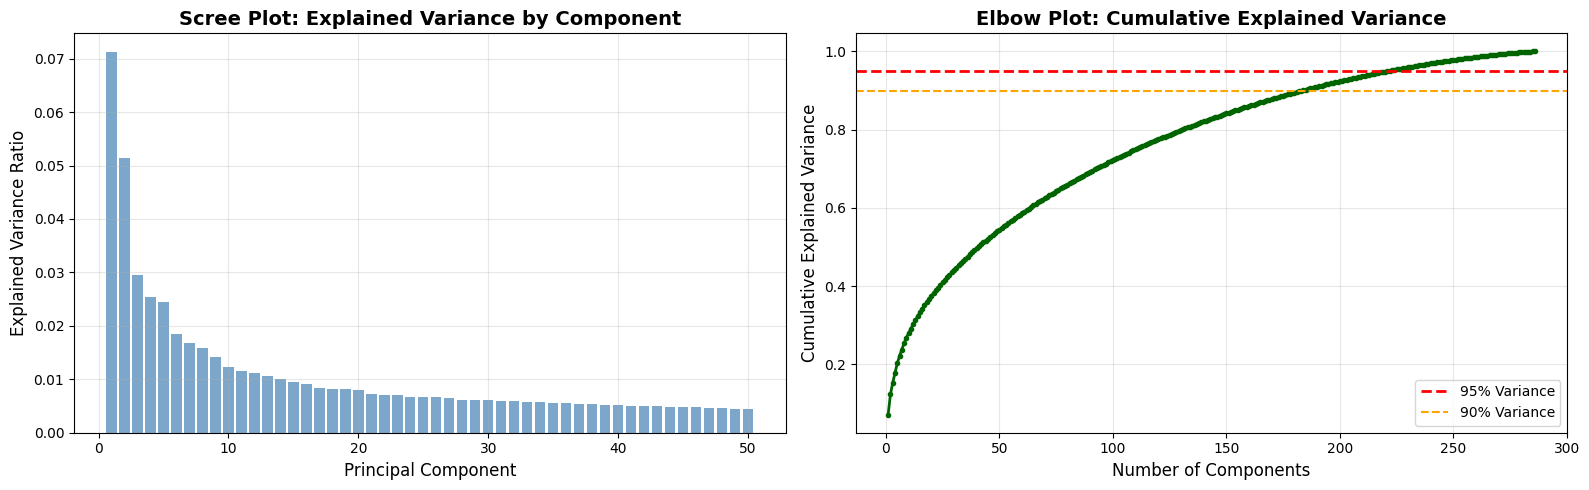


=== Components needed for variance thresholds ===
Components needed for 80% variance: 131
Components needed for 90% variance: 184
Components needed for 95% variance: 222
Components needed for 99% variance: 266

=== PCA Summary ===
- Original feature count: 286
- PCA components retained (95% variance): 222
- Total explained variance: 0.9510

=== Silhouette Analysis for K-Means Clustering on PCA Components ===
K=2: Silhouette Score = 0.0581
K=3: Silhouette Score = 0.0427
K=4: Silhouette Score = 0.0206
K=5: Silhouette Score = 0.0035
K=6: Silhouette Score = 0.0058
K=7: Silhouette Score = -0.0062
K=8: Silhouette Score = -0.0027
K=9: Silhouette Score = -0.0002
K=10: Silhouette Score = 0.0008


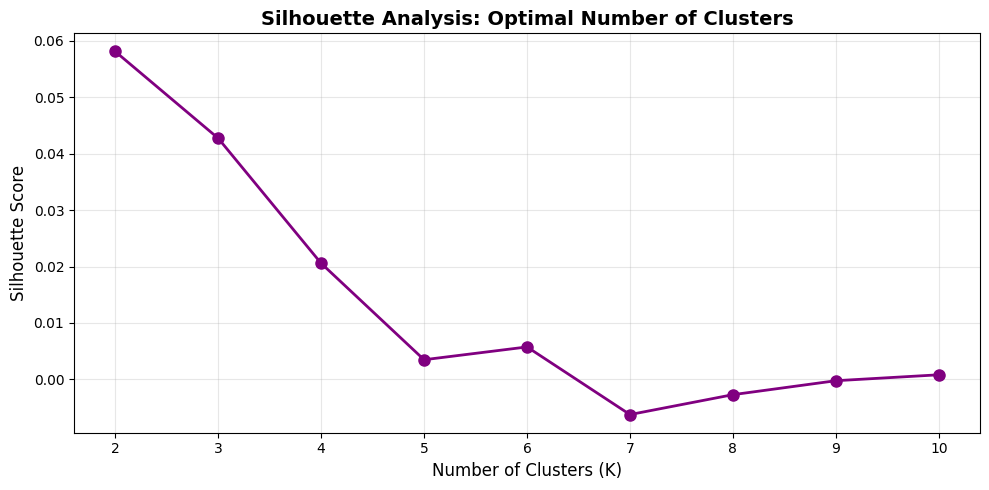


=== PCA Component Variance Table ===


,component,explained_variance,cumulative_explained_variance
0,1,0.071175,0.071175
1,2,0.051492,0.122667
2,3,0.029508,0.152175
3,4,0.025479,0.177654
4,5,0.024392,0.202046
5,6,0.018558,0.220603
6,7,0.016825,0.237428
7,8,0.015894,0.253322
8,9,0.014139,0.267462
9,10,0.012239,0.279701


In [4]:
# ============================
# Cell 3: PCA with Elbow & Silhouette Analysis
# ============================

# Get feature columns (excluding target)
feature_cols_all = [c for c in num_df.columns if c != target_col]
X_all = num_df[feature_cols_all].copy()

# Standardize features
scaler_pca = StandardScaler()
X_all_std = scaler_pca.fit_transform(X_all)

# First, fit PCA with all components to visualize
pca_full = PCA(random_state=42)
pca_full.fit(X_all_std)

# ============================
# PCA VISUALIZATION: ELBOW PLOTS
# ============================

# Plot 1: Scree Plot (Explained Variance per Component)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Scree plot - individual explained variance
n_components_to_show = min(50, len(pca_full.explained_variance_ratio_))
axes[0].bar(
    range(1, n_components_to_show + 1),
    pca_full.explained_variance_ratio_[:n_components_to_show],
    alpha=0.7,
    color='steelblue'
)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Scree Plot: Explained Variance by Component', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Cumulative explained variance (Elbow curve)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
axes[1].plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker='o',
    markersize=3,
    linewidth=2,
    color='darkgreen'
)
axes[1].axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% Variance')
axes[1].axhline(y=0.90, color='orange', linestyle='--', linewidth=1.5, label='90% Variance')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Elbow Plot: Cumulative Explained Variance', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Find number of components for different variance thresholds
print("\n=== Components needed for variance thresholds ===")
for threshold in [0.80, 0.90, 0.95, 0.99]:
    n_comp = np.argmax(cumulative_variance >= threshold) + 1
    print(f"Components needed for {threshold*100:.0f}% variance: {n_comp}")

# Now apply PCA with 95% variance threshold
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_all_std)

print("\n=== PCA Summary ===")
print(f"- Original feature count: {len(feature_cols_all)}")
print(f"- PCA components retained (95% variance): {pca.n_components_}")
print(f"- Total explained variance: {np.sum(pca.explained_variance_ratio_):.4f}")

# ============================
# SILHOUETTE ANALYSIS (Optional Clustering on PCA Components)
# ============================
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Test different numbers of clusters
silhouette_scores = []
K_range = range(2, 11)

print("\n=== Silhouette Analysis for K-Means Clustering on PCA Components ===")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}: Silhouette Score = {silhouette_avg:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o', linewidth=2, markersize=8, color='purple')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis: Optimal Number of Clusters', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()


# Show cumulative variance table
cum_var = np.cumsum(pca.explained_variance_ratio_)
pca_var_df = pd.DataFrame({
    "component": np.arange(1, len(cum_var) + 1),
    "explained_variance": pca.explained_variance_ratio_,
    "cumulative_explained_variance": cum_var
})
print("\n=== PCA Component Variance Table ===")
display(pca_var_df.head(15))

# NOTE:
# - later cells will use X_pca for modeling


In [5]:
# ============================
# Cell 4: Prepare Data for Cross-Validation
# ============================

# Use the original preprocessed features
feature_cols_all = [c for c in num_df.columns if c != target_col]
X = num_df[feature_cols_all].copy()
y = num_df[target_col].copy()

# Store feature names for later use in feature importance analysis
feature_names = feature_cols_all.copy()

print(f"Using {len(feature_cols_all)} original features for modeling")
print(f"Dataset shape: {X.shape}")

# Standardize the features
# Note: Cross-validation will handle train/test splitting internally
# StandardScaler will be applied within each fold to prevent data leakage
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n✓ Features standardized using StandardScaler")
print(f"✓ Feature names stored for importance analysis")
print(f"✓ Ready for 5-fold cross-validation")
print(f"\nNote: Cross-validation will split data into 5 folds")
print(f"      Each fold will be used as validation once while training on the other 4")


Using 286 original features for modeling
Dataset shape: (2012, 286)

✓ Features standardized using StandardScaler
✓ Feature names stored for importance analysis
✓ Ready for 5-fold cross-validation

Note: Cross-validation will split data into 5 folds
      Each fold will be used as validation once while training on the other 4


In [6]:
# ============================
# Cell 5: Cross-Validation Evaluation Helper
# ============================
from sklearn.model_selection import cross_validate, cross_val_score
import numpy as np

def adjusted_r2(r2, n, k):
    """Calculate adjusted R-squared"""
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

def evaluate_with_cv(name, model, X, y, cv=5):
    """
    Evaluate model using k-fold cross-validation
    
    Parameters:
    -----------
    name : str
        Model name
    model : sklearn estimator
        Fitted model to evaluate
    X : array-like
        Features
    y : array-like
        Target variable
    cv : int
        Number of cross-validation folds (default=5)
    
    Returns:
    --------
    metrics : dict
        Dictionary containing cross-validation metrics
    """
    # Perform cross-validation with multiple metrics
    scoring = {
        'r2': 'r2',
        'neg_mse': 'neg_mean_squared_error',
        'neg_mae': 'neg_mean_absolute_error'
    }
    
    cv_results = cross_validate(
        model, X, y, 
        cv=cv, 
        scoring=scoring,
        return_train_score=True
    )
    
    # Calculate mean and std for each metric
    n_samples = len(y)
    n_features = X.shape[1]
    
    metrics = {
        "model": name,
        
        # Training scores
        "train_r2_mean": cv_results['train_r2'].mean(),
        "train_r2_std": cv_results['train_r2'].std(),
        
        # Validation scores
        "cv_r2_mean": cv_results['test_r2'].mean(),
        "cv_r2_std": cv_results['test_r2'].std(),
        
        # RMSE
        "cv_rmse_mean": np.sqrt(-cv_results['test_neg_mse'].mean()),
        "cv_rmse_std": np.sqrt(cv_results['test_neg_mse'].var()),
        
        # MAE
        "cv_mae_mean": -cv_results['test_neg_mae'].mean(),
        "cv_mae_std": cv_results['test_neg_mae'].std(),
        
        # Adjusted R2 (approximate using mean validation R2)
        "cv_adjr2_mean": adjusted_r2(
            cv_results['test_r2'].mean(), 
            n_samples, 
            n_features
        ),
        
        # Individual fold scores for reference
        "cv_r2_folds": cv_results['test_r2'].tolist(),
    }
    
    # Print summary
    print(f"\n{'='*60}")
    print(f"Model: {name}")
    print(f"{'='*60}")
    print(f"Train R² (mean ± std): {metrics['train_r2_mean']:.4f} ± {metrics['train_r2_std']:.4f}")
    print(f"CV R² (mean ± std):    {metrics['cv_r2_mean']:.4f} ± {metrics['cv_r2_std']:.4f}")
    print(f"CV RMSE (mean ± std):  {metrics['cv_rmse_mean']:.4f} ± {metrics['cv_rmse_std']:.4f}")
    print(f"CV MAE (mean ± std):   {metrics['cv_mae_mean']:.4f} ± {metrics['cv_mae_std']:.4f}")
    print(f"CV Adj R² (mean):      {metrics['cv_adjr2_mean']:.4f}")
    print(f"\nR² scores per fold: {[f'{x:.4f}' for x in metrics['cv_r2_folds']]}")
    
    return metrics


In [7]:
# ============================
# Cell 6: LLM grid helper + fallback
# ============================
def get_fallback_grid(model_name: str):
    """
    Comprehensive hyperparameter grids for model tuning
    Expanded ranges for thorough grid search
    """
    name = model_name.lower()
    
    if "ridge" in name:
        return {
            "alpha": [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
        }
    
    if "lasso" in name:
        return {
            "alpha": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0], 
            "max_iter": [5000, 10000]
        }
    
    if "elastic" in name:
        return {
            "alpha": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
            "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99],
            "max_iter": [5000, 10000]
        }
    
    # No hyperparameters for basic Linear Regression
    return None

def get_llm_grid(model_name: str):
    """
    LLM-generated hyperparameter grids (with fallback)
    """
    if client is None:
        return get_fallback_grid(model_name)
    
    try:
        prompt = f"""
        For the model '{model_name}' in sklearn, return a Python dictionary 
        of hyperparameter grids suitable for GridSearchCV. 
        
        Requirements:
        - Use comprehensive ranges (10+ values for main parameters)
        - Include both small and large values
        - For Ridge: test alpha from 0.001 to 1000
        - For Lasso: test alpha from 0.0001 to 1.0, include max_iter
        - For ElasticNet: test alpha from 0.0001 to 1.0, l1_ratio from 0.1 to 0.99, include max_iter
        
        Return ONLY a valid Python dict with no extra text.
        Example format: {{"alpha": [0.001, 0.01, 0.1, 1.0, 10.0]}}
        """
        
        resp = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.0,
        )
        txt = resp.choices[0].message.content.strip()
        grid = json.loads(txt.replace("'", '"'))
        return grid
    except Exception:
        return get_fallback_grid(model_name)


In [8]:
# ============================
# Cell 7: GridSearch with Cross-Validation
# ============================
def tune_and_evaluate(
    name,
    estimator,
    X,
    y,
    use_llm_grid=True,
    cv=5
):
    """
    Tune hyperparameters using GridSearchCV and evaluate using cross-validation
    
    Parameters:
    -----------
    name : str
        Model name
    estimator : sklearn estimator
        Model to tune and evaluate
    X : array-like
        Features
    y : array-like
        Target variable
    use_llm_grid : bool
        Whether to use LLM-generated grid (if False, uses fallback)
    cv : int
        Number of cross-validation folds (default=5)
    
    Returns:
    --------
    best_model : sklearn estimator
        Best model after hyperparameter tuning
    metrics : dict
        Dictionary containing cross-validation metrics
    """
    # Get hyperparameter grid
    if use_llm_grid:
        param_grid = get_llm_grid(name)
    else:
        param_grid = get_fallback_grid(name)

    # Perform grid search with cross-validation
    if param_grid:
        print(f"\n>>> Running GridSearchCV for {name}")
        print(f"    Hyperparameter grid: {param_grid}")
        print(f"    Cross-validation folds: {cv}")
        
        gs = GridSearchCV(
            estimator,
            param_grid=param_grid,
            cv=cv,
            scoring="r2",
            n_jobs=-1,
            verbose=0
        )
        gs.fit(X, y)
        best_model = gs.best_estimator_
        
        print(f"    Best parameters: {gs.best_params_}")
        print(f"    Best CV R² score: {gs.best_score_:.4f}")
    else:
        print(f"\n>>> No hyperparameters to tune for {name}")
        print(f"    Fitting model directly with {cv}-fold CV")
        best_model = estimator.fit(X, y)

    # Evaluate the best model using cross-validation
    metrics = evaluate_with_cv(name, best_model, X, y, cv=cv)
    
    # Add additional info
    metrics["best_params"] = gs.best_params_ if param_grid else {}
    metrics["n_features"] = X.shape[1]
    
    return best_model, metrics


In [9]:
# ============================
# Cell 8: Train All Models with 5-Fold Cross-Validation
# ============================
results = []
trained_models = {}  # Store trained models for feature importance analysis

print("="*70)
print("TRAINING MODELS WITH 5-FOLD CROSS-VALIDATION")
print("="*70)

# 1. Linear Regression (OLS)
print("\n[1/4] Linear Regression (OLS)")
ols = LinearRegression()
ols, m_ols = tune_and_evaluate(
    "Linear Regression (OLS)",
    ols,
    X_scaled,
    y,
    use_llm_grid=False,  # OLS has no hyperparameters
    cv=5
)
results.append(m_ols)
trained_models["Linear Regression (OLS)"] = ols

# 2. Ridge Regression
print("\n[2/4] Ridge Regression")
ridge = Ridge(random_state=42)
ridge, m_ridge = tune_and_evaluate(
    "Ridge Regression",
    ridge,
    X_scaled,
    y,
    use_llm_grid=True,
    cv=5
)
results.append(m_ridge)
trained_models["Ridge Regression"] = ridge

# 3. Lasso Regression
print("\n[3/4] Lasso Regression")
lasso = Lasso(random_state=42)
lasso, m_lasso = tune_and_evaluate(
    "Lasso Regression",
    lasso,
    X_scaled,
    y,
    use_llm_grid=True,
    cv=5
)
results.append(m_lasso)
trained_models["Lasso Regression"] = lasso

# 4. ElasticNet Regression
print("\n[4/4] ElasticNet Regression")
elastic = ElasticNet(random_state=42)
elastic, m_elastic = tune_and_evaluate(
    "ElasticNet Regression",
    elastic,
    X_scaled,
    y,
    use_llm_grid=True,
    cv=5
)
results.append(m_elastic)
trained_models["ElasticNet Regression"] = elastic

print("\n" + "="*70)
print("ALL MODELS TRAINED SUCCESSFULLY!")
print("="*70)
print(f"\n✓ {len(trained_models)} models stored for feature importance analysis")


TRAINING MODELS WITH 5-FOLD CROSS-VALIDATION

[1/4] Linear Regression (OLS)

>>> No hyperparameters to tune for Linear Regression (OLS)
    Fitting model directly with 5-fold CV

Model: Linear Regression (OLS)
Train R² (mean ± std): 0.6338 ± 0.0114
CV R² (mean ± std):    0.4352 ± 0.0658
CV RMSE (mean ± std):  1.0127 ± 0.1431
CV MAE (mean ± std):   0.7459 ± 0.0286
CV Adj R² (mean):      0.3415

R² scores per fold: ['0.3560', '0.3540', '0.4983', '0.4891', '0.4785']

[2/4] Ridge Regression

>>> Running GridSearchCV for Ridge Regression
    Hyperparameter grid: {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]}
    Cross-validation folds: 5
    Best parameters: {'alpha': 500.0}
    Best CV R² score: 0.4905

Model: Ridge Regression
Train R² (mean ± std): 0.5999 ± 0.0106
CV R² (mean ± std):    0.4905 ± 0.0446
CV RMSE (mean ± std):  0.9614 ± 0.1009
CV MAE (mean ± std):   0.7088 ± 0.0243
CV Adj R² (mean):      0.4060

R² scores per fold: ['0.4522', '0.4228', '0.5200

In [10]:
# ============================
# Cell 9: Cross-Validation Results Table
# ============================
results_df = pd.DataFrame(results)

# Select columns to display
cols = [c for c in [
    "model",
    "train_r2_mean", "train_r2_std",
    "cv_r2_mean", "cv_r2_std",
    "cv_adjr2_mean",
    "cv_rmse_mean", "cv_rmse_std",
    "cv_mae_mean", "cv_mae_std",
    "best_params",
    "n_features",
] if c in results_df.columns]

# Display results sorted by CV R² score
print("\n" + "="*70)
print("CROSS-VALIDATION RESULTS (sorted by CV R² mean)")
print("="*70)
display(
    results_df[cols].sort_values(by="cv_r2_mean", ascending=False).reset_index(drop=True)
)

# Summary statistics
print("\n" + "="*70)
print("SUMMARY")
print("="*70)
best_model = results_df.loc[results_df['cv_r2_mean'].idxmax()]
print(f"Best Model: {best_model['model']}")
print(f"  CV R²: {best_model['cv_r2_mean']:.4f} ± {best_model['cv_r2_std']:.4f}")
print(f"  CV RMSE: {best_model['cv_rmse_mean']:.4f} ± {best_model['cv_rmse_std']:.4f}")
print(f"  CV MAE: {best_model['cv_mae_mean']:.4f} ± {best_model['cv_mae_std']:.4f}")
print(f"  Best Params: {best_model['best_params']}")

# Check for overfitting
print("\n" + "="*70)
print("OVERFITTING CHECK")
print("="*70)
for _, row in results_df.iterrows():
    train_r2 = row['train_r2_mean']
    cv_r2 = row['cv_r2_mean']
    diff = train_r2 - cv_r2
    
    if diff > 0.1:
        status = "⚠️  POTENTIAL OVERFITTING"
    elif diff > 0.05:
        status = "⚡ Slight overfitting"
    else:
        status = "✅ Good generalization"
    
    print(f"{row['model']:30s} | Train R²: {train_r2:.4f} | CV R²: {cv_r2:.4f} | Diff: {diff:.4f} | {status}")



CROSS-VALIDATION RESULTS (sorted by CV R² mean)


,model,train_r2_mean,train_r2_std,cv_r2_mean,cv_r2_std,cv_adjr2_mean,cv_rmse_mean,cv_rmse_std,cv_mae_mean,cv_mae_std,best_params,n_features
0,ElasticNet Regression,0.546822,0.013014,0.530506,0.050701,0.452666,0.923295,0.112877,0.659859,0.035043,"{'alpha': 0.05, 'l1_ratio': 0.95, 'max_iter': 5000}",286
1,Lasso Regression,0.545294,0.013135,0.530379,0.050747,0.452518,0.923417,0.112926,0.659601,0.035126,"{'alpha': 0.05, 'max_iter': 5000}",286
2,Ridge Regression,0.599893,0.010575,0.490478,0.044562,0.406000,0.961402,0.100932,0.708829,0.024293,{'alpha': 500.0},286
3,Linear Regression (OLS),0.633800,0.011407,0.435166,0.065783,0.341518,1.012730,0.143081,0.745932,0.028561,{},286



SUMMARY
Best Model: ElasticNet Regression
  CV R²: 0.5305 ± 0.0507
  CV RMSE: 0.9233 ± 0.1129
  CV MAE: 0.6599 ± 0.0350
  Best Params: {'alpha': 0.05, 'l1_ratio': 0.95, 'max_iter': 5000}

OVERFITTING CHECK
Linear Regression (OLS)        | Train R²: 0.6338 | CV R²: 0.4352 | Diff: 0.1986 | ⚠️  POTENTIAL OVERFITTING
Ridge Regression               | Train R²: 0.5999 | CV R²: 0.4905 | Diff: 0.1094 | ⚠️  POTENTIAL OVERFITTING
Lasso Regression               | Train R²: 0.5453 | CV R²: 0.5304 | Diff: 0.0149 | ✅ Good generalization
ElasticNet Regression          | Train R²: 0.5468 | CV R²: 0.5305 | Diff: 0.0163 | ✅ Good generalization


In [11]:
# ============================
# Cell 10: Feature Importance Analysis
# ============================

# Display coefficient interpretation guide
print("="*70)
print("📚 UNDERSTANDING COEFFICIENTS IN LINEAR REGRESSION")
print("="*70)
print("""
IMPORTANT: All features have been STANDARDIZED (mean=0, std=1)

COEFFICIENT VALUE (e.g., +0.52 or -0.35):
  - Shows DIRECTION and MAGNITUDE of the relationship
  - POSITIVE (+): When feature increases by 1 SD → target increases
  - NEGATIVE (-): When feature increases by 1 SD → target decreases
  - MAGNITUDE: Size of the coefficient = strength of the effect
  
  Example: Coefficient = +0.52 for "Life Satisfaction"
  → A 1 standard deviation increase in life satisfaction 
    leads to a 0.52 standard deviation increase in the target

ABSOLUTE VALUE (e.g., 0.52 from either +0.52 or -0.52):
  - Shows IMPORTANCE regardless of direction
  - Used to RANK features by impact strength
  - Higher |coefficient| = more important feature
  - Doesn't tell you if relationship is positive or negative

WHY THIS MATTERS:
  - Features are directly comparable (all on same scale)
  - You can compare coefficients across different features
  - A coefficient of +0.5 has the same strength as -0.5 (just opposite direction)
  
NOTE: Look at BOTH values to fully understand a feature:
  → Coefficient value: What happens when feature changes
  → Absolute value: How important the feature is overall
""")
print("="*70)

def get_feature_importance(model, feature_names, model_name):
    """
    Extract feature importance from linear models based on coefficients
    
    Parameters:
    -----------
    model : sklearn estimator
        Trained linear model
    feature_names : list
        List of feature names
    model_name : str
        Name of the model
    
    Returns:
    --------
    importance_df : DataFrame
        DataFrame with features and their importance scores
    """
    # Get coefficients
    if hasattr(model, 'coef_'):
        coefficients = model.coef_
    else:
        print(f"Model {model_name} does not have coefficients")
        return None
    
    # Create DataFrame with feature names and absolute coefficient values
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefficients,
        'abs_coefficient': np.abs(coefficients)
    })
    
    # Sort by absolute coefficient value (importance)
    importance_df = importance_df.sort_values('abs_coefficient', ascending=False)
    
    return importance_df

print("\n" + "="*70)
print("FEATURE IMPORTANCE ANALYSIS - TOP 20 FEATURES PER MODEL")
print("="*70)

# Analyze each model
all_feature_importances = {}

for model_name, model in trained_models.items():
    print(f"\n{'='*70}")
    print(f"MODEL: {model_name}")
    print(f"{'='*70}")
    
    importance_df = get_feature_importance(model, feature_names, model_name)
    
    if importance_df is not None:
        # Store for later use
        all_feature_importances[model_name] = importance_df
        
        # Display top 20 features
        top_20 = importance_df.head(20)
        
        print(f"\nTop 20 Most Important Features (by absolute coefficient):")
        print(f"{'Rank':<6} {'Feature':<50} {'Coefficient':<15} {'|Coefficient|':<15} {'Impact':<12}")
        print("-" * 105)
        
        for idx, (_, row) in enumerate(top_20.iterrows(), 1):
            feature = row['feature']
            coef = row['coefficient']
            abs_coef = row['abs_coefficient']
            
            # Determine impact direction
            if coef > 0.001:
                impact = "↑ Positive"
            elif coef < -0.001:
                impact = "↓ Negative"
            else:
                impact = "○ Zero"
            
            # Truncate long feature names
            feature_display = feature[:47] + "..." if len(feature) > 50 else feature
            
            print(f"{idx:<6} {feature_display:<50} {coef:>14.6f} {abs_coef:>14.6f} {impact:<12}")
        
        # Show statistics
        print(f"\nCoefficient Statistics:")
        print(f"  Max absolute coefficient: {importance_df['abs_coefficient'].max():.6f}")
        print(f"  Mean absolute coefficient: {importance_df['abs_coefficient'].mean():.6f}")
        print(f"  Median absolute coefficient: {importance_df['abs_coefficient'].median():.6f}")
        print(f"  Non-zero coefficients: {(importance_df['abs_coefficient'] > 1e-10).sum()} / {len(importance_df)}")
        
        # Count positive vs negative coefficients
        n_positive = (importance_df['coefficient'] > 1e-10).sum()
        n_negative = (importance_df['coefficient'] < -1e-10).sum()
        n_zero = len(importance_df) - n_positive - n_negative
        print(f"  Positive coefficients: {n_positive}")
        print(f"  Negative coefficients: {n_negative}")
        print(f"  Near-zero coefficients: {n_zero}")

# Summary: Compare top features across models
print(f"\n{'='*70}")
print("FEATURE OVERLAP ANALYSIS")
print(f"{'='*70}")

# Get top 10 features for each model
top_features_per_model = {}
for model_name, importance_df in all_feature_importances.items():
    top_features_per_model[model_name] = set(importance_df.head(10)['feature'].tolist())

# Find common top features
if len(top_features_per_model) > 1:
    all_top_features = set.intersection(*top_features_per_model.values())
    print(f"\nFeatures in TOP 10 of ALL models ({len(all_top_features)} features):")
    if all_top_features:
        for feat in sorted(all_top_features):
            print(f"  ✓ {feat}")
            # Show coefficients across models
            for model_name, importance_df in all_feature_importances.items():
                feat_coef = importance_df[importance_df['feature'] == feat]['coefficient'].values[0]
                direction = "↑" if feat_coef > 0 else "↓"
                print(f"      {model_name:30s}: {feat_coef:>8.4f} {direction}")
    
    # Show model-specific top features
    print(f"\nModel-Specific Top Features (unique to each model):")
    for model_name, top_feats in top_features_per_model.items():
        unique_feats = top_feats - set.union(*[v for k, v in top_features_per_model.items() if k != model_name])
        if unique_feats:
            print(f"\n  {model_name}: {len(unique_feats)} unique features in top 10")
            for feat in sorted(unique_feats):
                coef = all_feature_importances[model_name][all_feature_importances[model_name]['feature'] == feat]['coefficient'].values[0]
                direction = "↑" if coef > 0 else "↓"
                print(f"    - {feat}: {coef:.4f} {direction}")

print(f"\n{'='*70}")


📚 UNDERSTANDING COEFFICIENTS IN LINEAR REGRESSION

IMPORTANT: All features have been STANDARDIZED (mean=0, std=1)

COEFFICIENT VALUE (e.g., +0.52 or -0.35):
  - Shows DIRECTION and MAGNITUDE of the relationship
  - POSITIVE (+): When feature increases by 1 SD → target increases
  - NEGATIVE (-): When feature increases by 1 SD → target decreases
  - MAGNITUDE: Size of the coefficient = strength of the effect

  Example: Coefficient = +0.52 for "Life Satisfaction"
  → A 1 standard deviation increase in life satisfaction 
    leads to a 0.52 standard deviation increase in the target

ABSOLUTE VALUE (e.g., 0.52 from either +0.52 or -0.52):
  - Shows IMPORTANCE regardless of direction
  - Used to RANK features by impact strength
  - Higher |coefficient| = more important feature
  - Doesn't tell you if relationship is positive or negative

WHY THIS MATTERS:
  - Features are directly comparable (all on same scale)
  - You can compare coefficients across different features
  - A coefficient of

In [12]:
# ============================
# Cell 11: Enhanced LLM Commentary with Feature Importance
# ============================

# Set pandas display options to show full output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

def call_llm_on_results_full(results, feature_importances):
    if client is None:
        print("LLM not available — skipping commentary.")
        return
    
    # Prepare results summary - convert numpy types to native Python types
    results_clean = []
    for result in results:
        clean_result = {}
        for key, value in result.items():
            # Convert numpy types to Python native types
            if isinstance(value, (np.integer, np.int64, np.int32)):
                clean_result[key] = int(value)
            elif isinstance(value, (np.floating, np.float64, np.float32)):
                clean_result[key] = float(value)
            elif isinstance(value, list):
                # Convert list items if they're numpy types
                clean_result[key] = [float(x) if isinstance(x, (np.floating, np.float64)) else x for x in value]
            else:
                clean_result[key] = value
        results_clean.append(clean_result)
    
    results_txt = json.dumps(results_clean, indent=2)
    
    # Prepare detailed feature importance with top 20 for each model
    feature_summary = {}
    for model_name, importance_df in feature_importances.items():
        top_20 = importance_df.head(20)
        
        # Convert numpy types to native Python types
        feature_summary[model_name] = {
            'top_20_features': top_20['feature'].tolist(),
            'top_20_coefficients': [float(x) for x in top_20['coefficient'].round(6).tolist()],
            'top_20_abs_coefficients': [float(x) for x in top_20['abs_coefficient'].round(6).tolist()],
            'non_zero_count': int((importance_df['abs_coefficient'] > 1e-10).sum()),
            'total_features': int(len(importance_df)),
            'max_abs_coef': float(importance_df['abs_coefficient'].max()),
            'mean_abs_coef': float(importance_df['abs_coefficient'].mean())
        }
    
    feature_txt = json.dumps(feature_summary, indent=2)
    
    prompt = f"""
    You are analyzing regression models trained on standardized features using 5-fold cross-validation.
    
    IMPORTANT CONTEXT - Understanding Coefficients:
    - All features have been STANDARDIZED (mean=0, std=1) before modeling
    - COEFFICIENT VALUE: Represents the change in the target variable for a 1 standard deviation change in the feature
      * POSITIVE coefficient: Feature increases → Target increases
      * NEGATIVE coefficient: Feature increases → Target decreases
      * Magnitude shows strength of relationship
    - ABSOLUTE VALUE: Shows feature importance regardless of direction
      * Higher absolute value = more important feature
      * Used to rank features by impact strength
    
    CRITICAL - HYPERPARAMETER TUNING ALREADY DONE:
    - GridSearchCV was already used with comprehensive hyperparameter grids:
      * Ridge: 11 alpha values tested (0.001 to 1000)
      * Lasso: 18 combinations tested (9 alpha × 2 max_iter)
      * ElasticNet: 126 combinations tested (9 alpha × 7 l1_ratio × 2 max_iter)
    - 5-fold cross-validation was used for hyperparameter selection
    - The models shown are ALREADY the best hyperparameter configurations
    - DO NOT suggest further hyperparameter tuning or GridSearchCV as improvements
    
    CROSS-VALIDATION RESULTS:
    {results_txt}
    
    TOP 20 FEATURES PER MODEL (with coefficients):
    {feature_txt}
    
    Please provide a comprehensive analysis with the following sections:
    
    1. COEFFICIENT INTERPRETATION PRIMER:
       - Briefly explain what coefficient values mean in this context
       - Clarify the difference between coefficient sign (direction) and absolute value (importance)
       - Mention that features are standardized, so coefficients are directly comparable
    
    2. MODEL PERFORMANCE ANALYSIS:
       - Identify the best-performing model based on CV R² score and standard deviation
       - Flag any overfitting issues (where train R² >> CV R²)
       - Comment on model stability (standard deviations across folds)
       - Note that these are already optimized via GridSearchCV
    
    3. TOP 20 FEATURES FOR EACH MODEL (CRITICAL - MUST BE DETAILED):
       For EACH of the 4 models, you MUST:
       
       A) LIST ALL TOP 20 FEATURES with their coefficients:
          Format for each feature:
          "Rank X: [Feature Name] (coef: [+/-X.XX], |coef|: X.XX, impact: [positive/negative])"
          
          Example format:
          "1. Q274: Satisfaction with your life (coef: +0.52, |coef|: 0.52, impact: positive)
           2. Q49: Feeling of happiness (coef: +0.41, |coef|: 0.41, impact: positive)
           3. Q288: Scale of incomes (coef: -0.39, |coef|: 0.39, impact: negative)
           ... continue for all 20 features"
       
       B) After listing all 20, provide interpretation:
          - What do the top 5 features tell us?
          - What's the balance between positive and negative predictors?
          - Note the coefficient magnitude range (strongest to 20th)
    
    4. CROSS-MODEL COMPARISON OF TOP 20 FEATURES:
       - Which features appear in ALL 4 models' top 20? List them with their coefficients across models
       - Which features are unique to specific models' top 20?
       - How do coefficient values differ across models for the same feature?
       - Compare feature selection: Which model is most sparse? Most inclusive?
       - Identify any features that flip sign (positive in one model, negative in another)
    
    5. KEY INSIGHTS FROM COEFFICIENTS:
       - Group features by coefficient sign to identify positive vs negative predictors
       - Identify any surprising or counterintuitive relationships
       - Note the magnitude range of important features
       - Discuss what the top features collectively suggest about the target variable
    
    6. ACTIONABLE RECOMMENDATIONS:
       DO NOT SUGGEST: Hyperparameter tuning (already done comprehensively)
       DO NOT SUGGEST: GridSearchCV (already implemented)
       
       INSTEAD, SUGGEST:
       - Feature engineering approaches (interactions, polynomials, transformations)
       - Data collection recommendations (which features need more investigation)
       - Domain-specific insights based on the important features
       - Ensemble methods or model stacking if appropriate
       - Feature selection techniques beyond regularization
       - Handling potential outliers or data quality issues
       - Alternative modeling approaches (if CV R² is low)
    
    CRITICAL: You MUST list all 20 features for each model with their coefficients. Do not summarize 
    or skip features. This is essential for understanding feature importance across models.
    
    Be specific with examples, reference actual features and their coefficients, and keep the tone 
    analytical but accessible. Focus on interpreting what the numbers actually mean in practice.
    """
    
    print("\n" + "="*70)
    print("🤖 LLM COMMENTARY: MODEL PERFORMANCE & FEATURE IMPORTANCE")
    print("="*70)
    print("\nGenerating comprehensive analysis with top 20 features for each model...")
    print("This may take a moment...\n")
    
    resp = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.3,
        max_tokens=4000  # Increased token limit for full output
    )
    
    # Print the full response without truncation
    full_response = resp.choices[0].message.content
    
    print("="*70)
    print(full_response)
    print("="*70)
    
    # Also save to a variable for potential further use
    return full_response

# Call LLM with both results and feature importance
llm_analysis = call_llm_on_results_full(results, all_feature_importances)

# Print completion message
print("\n✅ LLM Analysis Complete!")



🤖 LLM COMMENTARY: MODEL PERFORMANCE & FEATURE IMPORTANCE

Generating comprehensive analysis with top 20 features for each model...
This may take a moment...

### 1. COEFFICIENT INTERPRETATION PRIMER

In regression analysis, coefficient values represent the expected change in the target variable for a one standard deviation change in the corresponding feature. Given that all features in this analysis have been standardized (mean = 0, standard deviation = 1), the coefficients are directly comparable across features. 

- **Coefficient Sign**: A positive coefficient indicates that as the feature increases, the target variable is expected to increase. Conversely, a negative coefficient suggests that an increase in the feature will lead to a decrease in the target variable.
- **Absolute Value**: The absolute value of a coefficient reflects the importance of the feature in predicting the target variable, regardless of direction. A higher absolute value signifies a stronger relationship with 